In [16]:
#from tensorflow import tf2
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

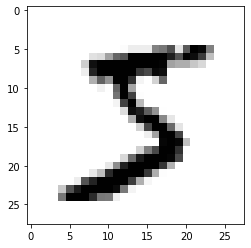

In [3]:
plt.imshow(x_train[0],cmap='binary')

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [24]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2061 - accuracy: 0.9373
Epoch 2/2
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0839 - accuracy: 0.9743


3


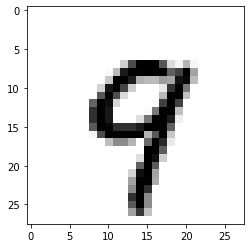

In [7]:
image_index =12
plt.imshow(x_test[image_index].reshape(28, 28),cmap='binary')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1,28, 28, 1))
print(pred.argmax())

In [21]:
kf=KFold(n_splits=5)

In [22]:
for train_index,text_index in kf.split(x_train):
    print(train_index," ",test_index)

[12000 12001 12002 ... 59997 59998 59999]   [    0     1     2 ... 11997 11998 11999]
[    0     1     2 ... 59997 59998 59999]   [    0     1     2 ... 11997 11998 11999]
[    0     1     2 ... 59997 59998 59999]   [    0     1     2 ... 11997 11998 11999]
[    0     1     2 ... 59997 59998 59999]   [    0     1     2 ... 11997 11998 11999]
[    0     1     2 ... 47997 47998 47999]   [    0     1     2 ... 11997 11998 11999]


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.